<a href="https://colab.research.google.com/github/Zeomite/ML-and-Vis-Project/blob/main/DL_Project_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification using CNN

In [1]:
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
train_csv=pd.read_csv('gdrive/My Drive/Training_set.csv')
test_csv=pd.read_csv('gdrive/My Drive/Testing_set.csv')

In [12]:
train_csv["label"].value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [13]:
img_data=[]
img_label=[]

for i in range(len(train_csv)):
    img="gdrive/My Drive/train/"+train_csv["filename"][i]
    img=load_img(img,target_size=(224,224))
    img=img_to_array(img)
    img_data.append(img)
    if i%100==0:
        print(i)
    img_label.append(train_csv["label"][i])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


KeyboardInterrupt: 

In [14]:
img_data=np.array(img_data)
img_label=np.array(img_label)

In [15]:
img_data.shape,img_label.shape

((7661, 224, 224, 3), (7661,))

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
img_label=encoder.fit_transform(img_label)

In [17]:
from sklearn.model_selection import train_test_split
# split the data into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6128, 224, 224, 3), (1533, 224, 224, 3), (6128,), (1533,))

In [19]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.metrics import CategoricalAccuracy,BinaryAccuracy,Recall,Precision
from keras import layers
import tensorflow as tf
base_model = VGG16(input_shape = (224,224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(15, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)



58889256/58889256 [==============================] - 1s 0us/step


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [1]:
hist = model.fit(X_train,  y_train, batch_size=8,epochs=10,validation_data=( X_test,y_test))

NameError: name 'model' is not defined

In [ ]:
model.save("model_saved")
reloaded_model = tf.keras.models.load_model("model_saved")

In [ ]:
dict=hist.history
dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

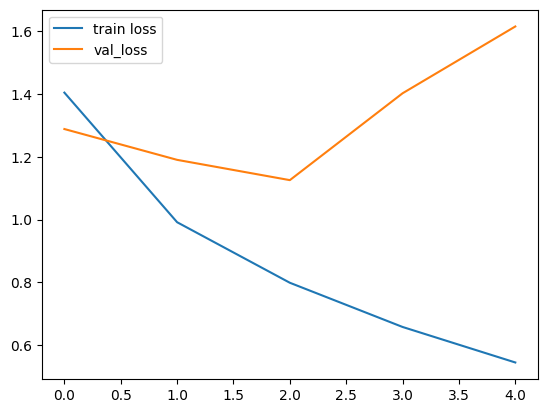

In [ ]:
plt.plot(dict['loss'], label='train loss')
plt.plot(dict['val_loss'], label='val_loss')
plt.legend()

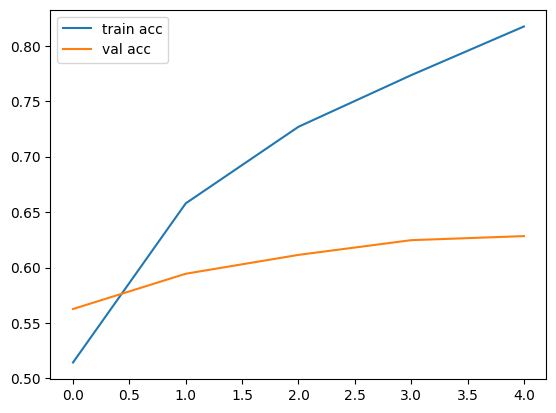

In [ ]:
plt.plot(dict['accuracy'], label='train acc')
plt.plot(dict['val_accuracy'], label='val acc')
plt.legend()

In [ ]:
y_pred= model.predict(X_ts)

313/313 [==============================] - 9s 28ms/step


In [ ]:
print(y_test_new[0])
print(y_pred[0])
print(np.argmax(y_pred[0]))

3
[7.9231297e-09 7.3599182e-08 3.8596104e-07 3.9201334e-01 8.2636307e-06
 6.1874533e-05 6.0786200e-01 3.9824868e-06 2.7920958e-06 4.7340065e-05]
6


In [ ]:
y_label=np.argmax(y_pred,axis=1)
print(y_label)

[6 8 0 ... 5 4 7]


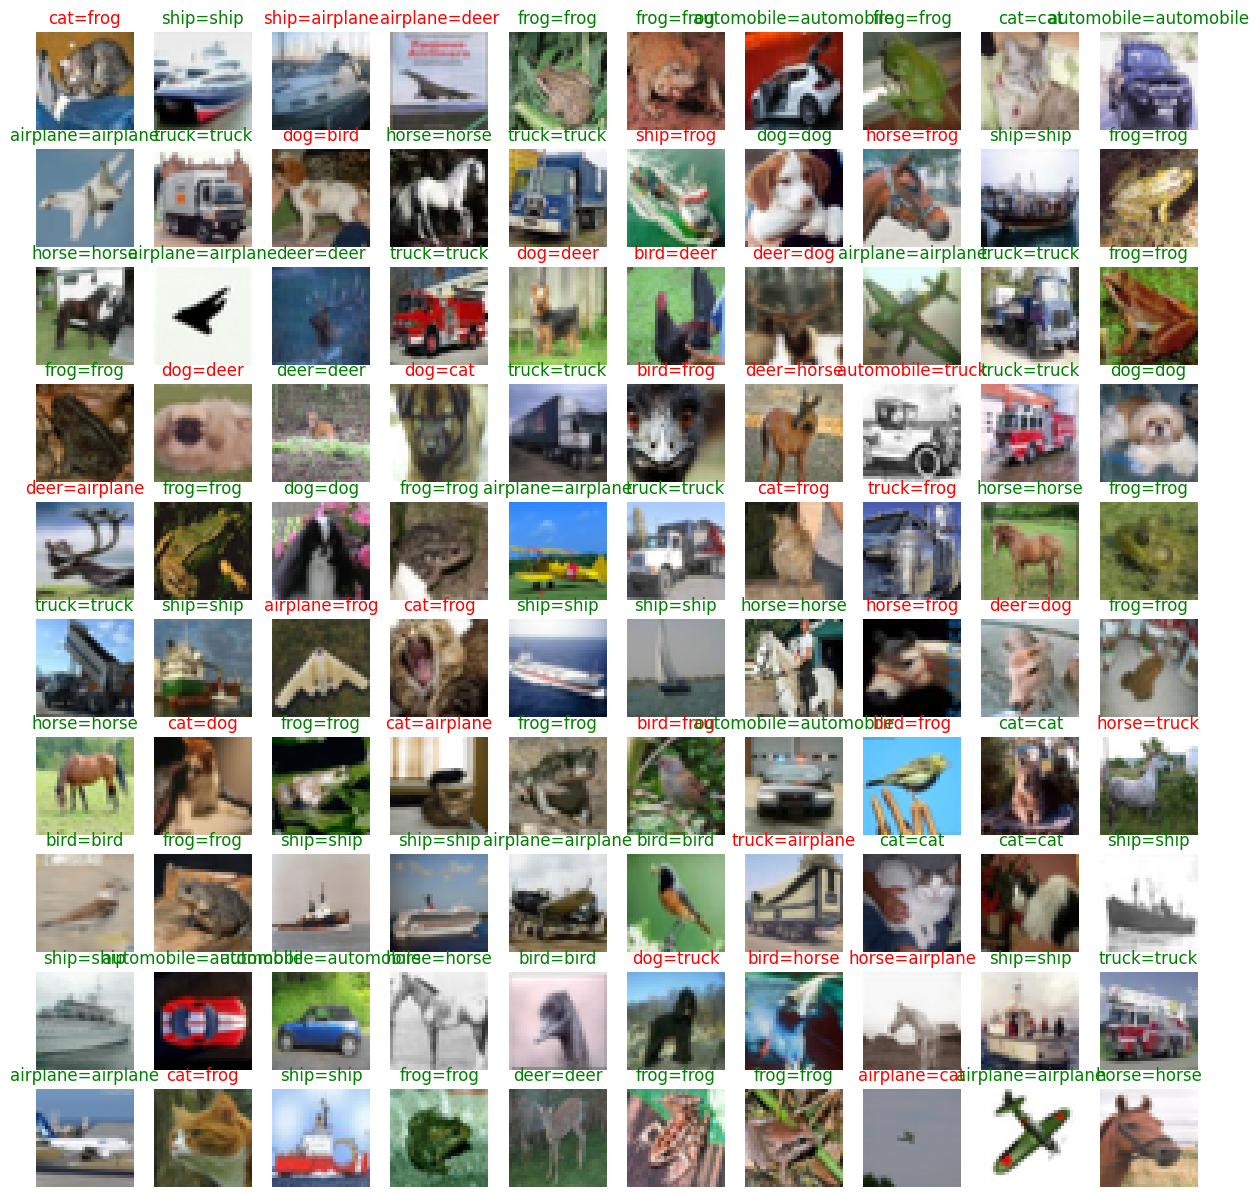

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(X_ts[i])
  plt.axis('off')
  if y_test_new[i] == y_label[i]:
    plt.title(class_labels[y_test_new[i]]+'='+class_labels[y_label[i]],c='g')
  else:
    plt.title(class_labels[y_test_new[i]]+'='+class_labels[y_label[i]],c='r')


In [ ]:
test_loss,test_acc=model.evaluate(X_ts,y_test_new)
print(test_acc)

313/313 [==============================] - 10s 30ms/step - loss: 1.6333 - accuracy: 0.6319
0.6319000124931335


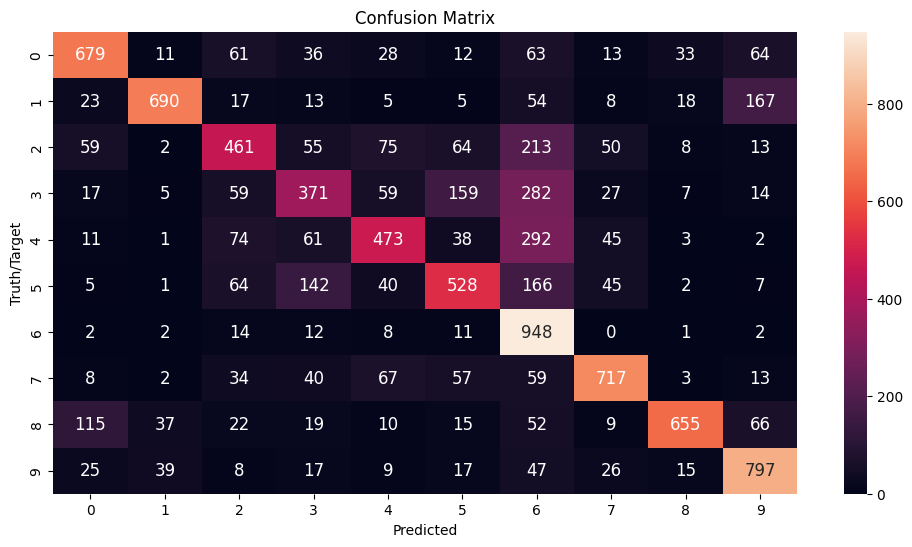

In [ ]:
# Generate confusion matrix
cm=tf.math.confusion_matrix(labels=y_test_new,predictions=y_label)
# Plot the confusion matrix as heat map
plt.figure(figsize=[12,6])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',annot_kws={"size":12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth/Target")
plt.show()